In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import squarify
import matplotlib.pyplot as plt
# %matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option("display.max_rows", 150)

In [3]:
df = pd.read_csv('ESP_circulatorias_1980_2020.csv', sep = ';', encoding = 'latin1', thousands = '.')
df.head()

,Causa de muerte,Edad,Sexo,Periodo,Total
0,053 Enfermedades cardíacas reumáticas crónicas,Todas las edades,Total,2020,1297
1,053 Enfermedades cardíacas reumáticas crónicas,Todas las edades,Total,2019,1499
2,053 Enfermedades cardíacas reumáticas crónicas,Todas las edades,Total,2018,1553
3,053 Enfermedades cardíacas reumáticas crónicas,Todas las edades,Total,2017,1567
4,053 Enfermedades cardíacas reumáticas crónicas,Todas las edades,Total,2016,1642


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Causa de muerte  369 non-null    object
 1   Edad             369 non-null    object
 2   Sexo             369 non-null    object
 3   Periodo          369 non-null    int64 
 4   Total            369 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 14.5+ KB


In [5]:
df.drop(['Edad', 'Sexo'], axis=1, inplace=True)
df.head()

,Causa de muerte,Periodo,Total
0,053 Enfermedades cardíacas reumáticas crónicas,2020,1297
1,053 Enfermedades cardíacas reumáticas crónicas,2019,1499
2,053 Enfermedades cardíacas reumáticas crónicas,2018,1553
3,053 Enfermedades cardíacas reumáticas crónicas,2017,1567
4,053 Enfermedades cardíacas reumáticas crónicas,2016,1642


In [6]:
list = []

for i in df['Causa de muerte']:
    i = i[4:]
    list.append(i)

In [7]:
df['Causa'] = list
df.head()

,Causa de muerte,Periodo,Total,Causa
0,053 Enfermedades cardíacas reumáticas crónicas,2020,1297,Enfermedades cardíacas reumáticas crónicas
1,053 Enfermedades cardíacas reumáticas crónicas,2019,1499,Enfermedades cardíacas reumáticas crónicas
2,053 Enfermedades cardíacas reumáticas crónicas,2018,1553,Enfermedades cardíacas reumáticas crónicas
3,053 Enfermedades cardíacas reumáticas crónicas,2017,1567,Enfermedades cardíacas reumáticas crónicas
4,053 Enfermedades cardíacas reumáticas crónicas,2016,1642,Enfermedades cardíacas reumáticas crónicas


In [8]:
df.drop('Causa de muerte', axis = 1, inplace=True)
df.head()

,Periodo,Total,Causa
0,2020,1297,Enfermedades cardíacas reumáticas crónicas
1,2019,1499,Enfermedades cardíacas reumáticas crónicas
2,2018,1553,Enfermedades cardíacas reumáticas crónicas
3,2017,1567,Enfermedades cardíacas reumáticas crónicas
4,2016,1642,Enfermedades cardíacas reumáticas crónicas


In [9]:
df['Causa'].unique()

array([' Enfermedades cardíacas reumáticas crónicas',
       ' Enfermedades hipertensivas', ' Infarto agudo de miocardio',
       ' Otras enfermedades isquémicas del corazón',
       ' Insuficiencia cardíaca', 'Otras enfermedades del corazón',
       ' Enfermedades cerebrovasculares', ' Aterosclerosis',
       ' Otras enfermedades de los vasos sanguíneos'], dtype=object)

In [10]:
df_cardiacas = df[df['Causa'] == 'Enfermedades cardíacas reumáticas crónicas']
df_hiper = df[df['Causa'] ==  'Enfermedades hipertensivas']
df_miocardio = df[df['Causa'] == ' Infarto agudo de miocardio']
df_isq = df[df['Causa'] == ' Otras enfermedades isquémicas del corazón']
df_insuf_card = df[df['Causa'] == ' Insuficiencia cardíaca']
df_otras_cor = df[df['Causa'] == 'Otras enfermedades del corazón']
df_cerebrovasc = df[df['Causa'] == ' Enfermedades cerebrovasculares']
df_atero = df[df['Causa'] == ' Aterosclerosis']
df_otras_vasos = df[df['Causa'] == ' Otras enfermedades de los vasos sanguíneos']

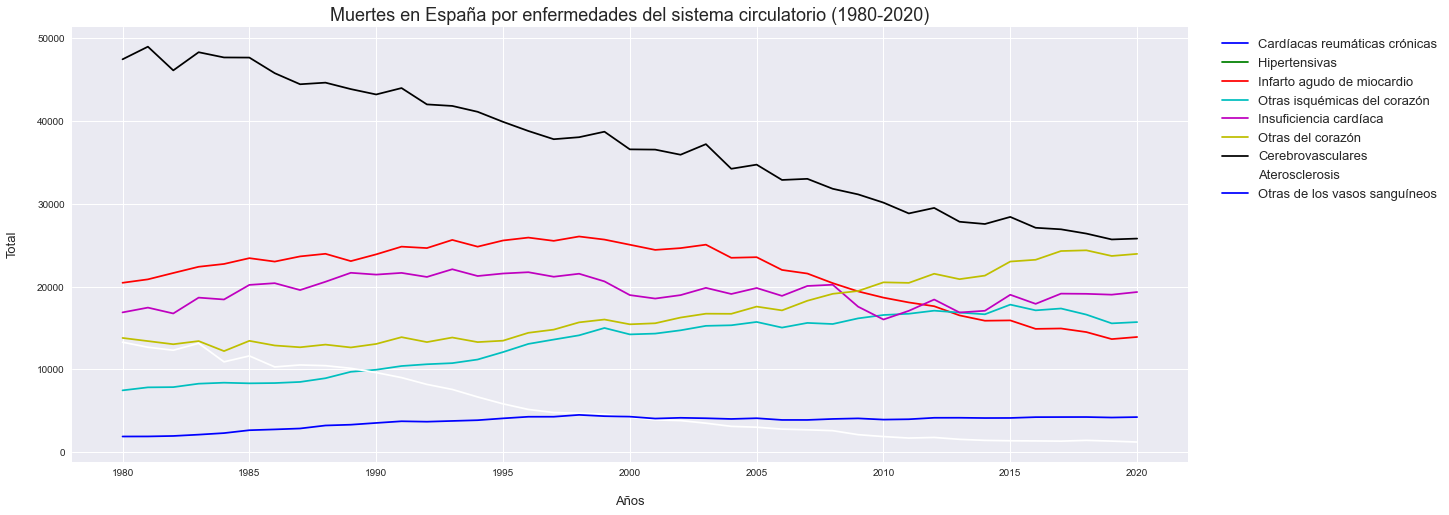

In [11]:
plt.style.use('seaborn')
plt.figure(figsize=(20,8))
plt.plot(df_cardiacas['Periodo'], df_cardiacas['Total'], linestyle = '-', color = 'b', label='Cardíacas reumáticas crónicas')
plt.plot(df_hiper['Periodo'], df_hiper['Total'], linestyle = '-', color = 'g', label='Hipertensivas')
plt.plot(df_miocardio['Periodo'], df_miocardio['Total'], linestyle = '-', color = 'r', label='Infarto agudo de miocardio')
plt.plot(df_isq['Periodo'], df_isq['Total'], linestyle = '-', color = 'c', label='Otras isquémicas del corazón')
plt.plot(df_insuf_card['Periodo'], df_insuf_card['Total'], linestyle = '-', color = 'm', label='Insuficiencia cardíaca')
plt.plot(df_otras_cor['Periodo'], df_otras_cor['Total'], linestyle = '-', color = 'y', label='Otras del corazón')
plt.plot(df_cerebrovasc['Periodo'], df_cerebrovasc['Total'], linestyle = '-', color = 'k', label='Cerebrovasculares')
plt.plot(df_atero['Periodo'], df_atero['Total'], linestyle = '-', color = 'w', label='Aterosclerosis')
plt.plot(df_otras_vasos['Periodo'], df_otras_vasos['Total'], linestyle = '-', color = 'b', label='Otras de los vasos sanguíneos')
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1), fontsize=13)
plt.title('Muertes en España por enfermedades del sistema circulatorio (1980-2020)', fontsize=18)
plt.xlabel('Años', size=13, labelpad=18)
plt.ylabel('Total', size=13, labelpad=18);

In [12]:
df_circ_20 = df[df['Periodo'] == 2020]
df_circ_20.sort_values('Total', inplace=True)
df_circ_20.head(9)

,Periodo,Total,Causa
287,2020,1237,Aterosclerosis
0,2020,1297,Enfermedades cardíacas reumáticas crónicas
328,2020,4251,Otras enfermedades de los vasos sanguíneos
82,2020,13927,Infarto agudo de miocardio
41,2020,14271,Enfermedades hipertensivas
123,2020,15727,Otras enfermedades isquémicas del corazón
164,2020,19358,Insuficiencia cardíaca
205,2020,23968,Otras enfermedades del corazón
246,2020,25817,Enfermedades cerebrovasculares


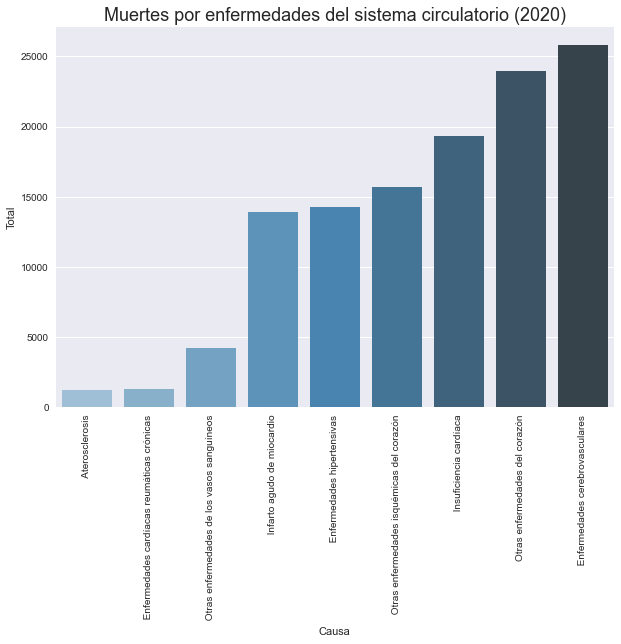

In [13]:
plt.figure(figsize=(10,7))

sns.barplot(
    x='Causa', 
    y='Total', 
    data=df_circ_20,
    palette="Blues_d",
    bottom = False)

sns.set_style('darkgrid')
plt.xticks(rotation=90)
plt.title( "Muertes por enfermedades del sistema circulatorio (2020)", size = 18 );

In [14]:
df_circ_80 = df[df['Periodo'] == 1980]
df_circ_80.sort_values('Total', inplace=True)
df_circ_80.head(9)

,Periodo,Total,Causa
368,1980,1906,Otras enfermedades de los vasos sanguíneos
81,1980,1952,Enfermedades hipertensivas
40,1980,2594,Enfermedades cardíacas reumáticas crónicas
163,1980,7479,Otras enfermedades isquémicas del corazón
327,1980,13297,Aterosclerosis
245,1980,13810,Otras enfermedades del corazón
204,1980,16898,Insuficiencia cardíaca
122,1980,20476,Infarto agudo de miocardio
286,1980,47475,Enfermedades cerebrovasculares


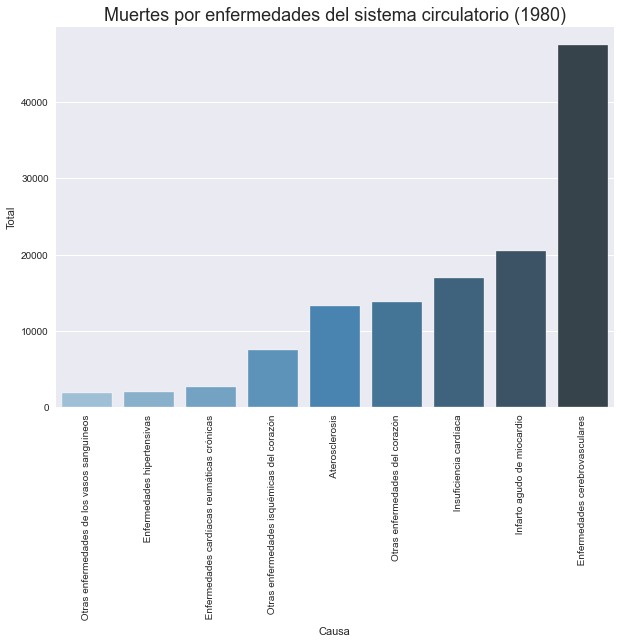

In [15]:
plt.figure(figsize=(10,7))

sns.barplot(
    x='Causa', 
    y='Total', 
    data=df_circ_80,
    palette="Blues_d",
    bottom = False)

sns.set_style('darkgrid')
plt.xticks(rotation=90)
plt.title( "Muertes por enfermedades del sistema circulatorio (1980)", size = 18 );

In [16]:
df_circ_80_20 = pd.merge(df_circ_80, df_circ_20, on='Causa', how='inner')
df_circ_80_20.head(9)

,Periodo_x,Total_x,Causa,Periodo_y,Total_y
0,1980,1906,Otras enfermedades de los vasos sanguíneos,2020,4251
1,1980,1952,Enfermedades hipertensivas,2020,14271
2,1980,2594,Enfermedades cardíacas reumáticas crónicas,2020,1297
3,1980,7479,Otras enfermedades isquémicas del corazón,2020,15727
4,1980,13297,Aterosclerosis,2020,1237
5,1980,13810,Otras enfermedades del corazón,2020,23968
6,1980,16898,Insuficiencia cardíaca,2020,19358
7,1980,20476,Infarto agudo de miocardio,2020,13927
8,1980,47475,Enfermedades cerebrovasculares,2020,25817


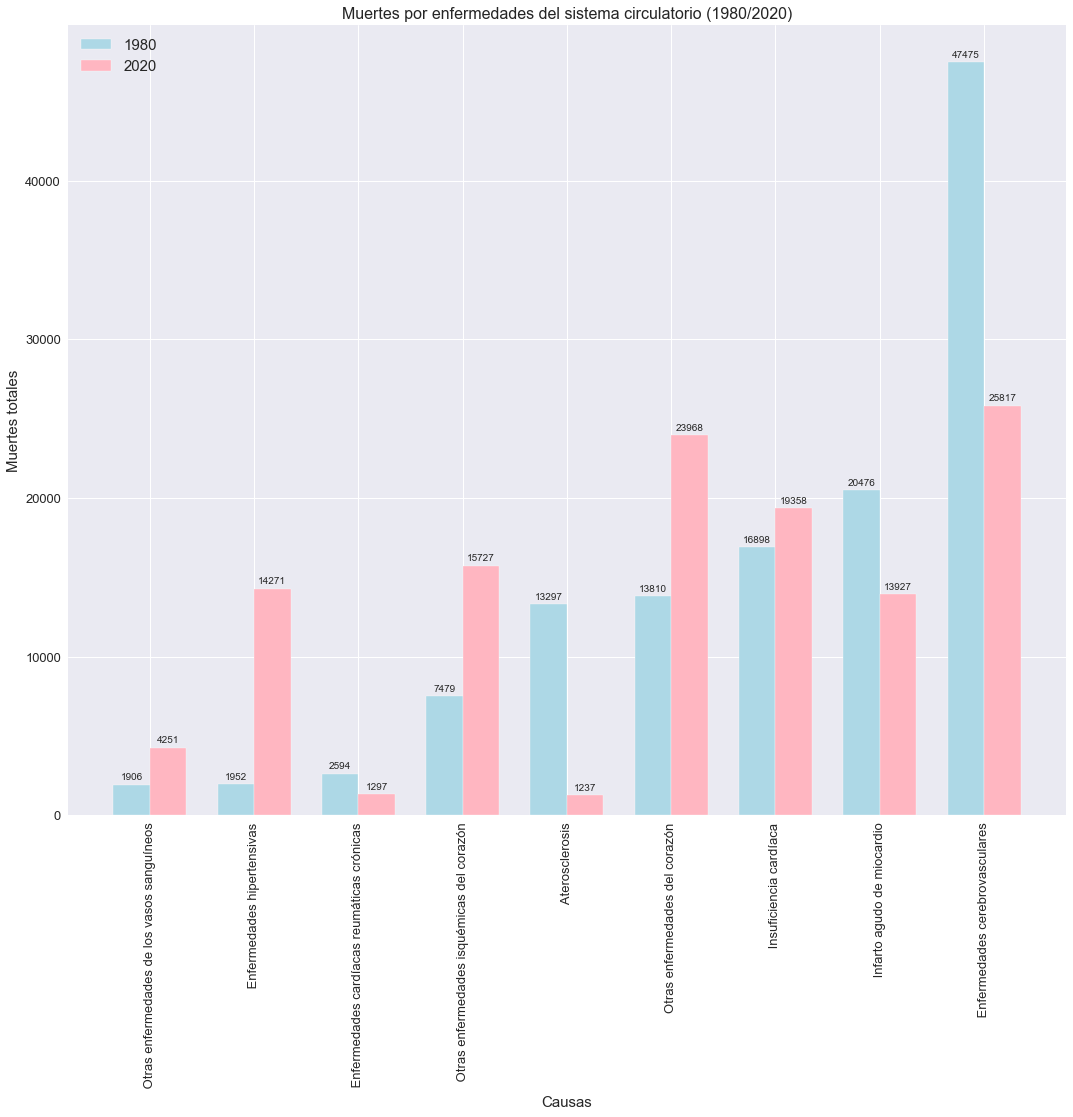

In [17]:
x = np.arange(len(df_circ_80_20['Causa']))
width = 0.35

fig, ax = plt.subplots()
fig.set_size_inches(15,12)
rects1 = ax.bar(x - width/2, df_circ_80_20['Total_x'], width, label='1980', color='lightblue')
rects2 = ax.bar(x + width/2, df_circ_80_20['Total_y'], width, label='2020', color='lightpink')

ax.set_ylabel('Muertes totales', size = 15)
ax.set_xlabel('Causas', size = 15)
ax.set_title('Muertes por enfermedades del sistema circulatorio (1980/2020)', size = 16)
ax.set_xticks(x, df_circ_80_20['Causa'])
ax.legend( loc='upper left', prop={'size': 15}, shadow=True)

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.yticks(size = 13)
plt.xticks(rotation=90, size = 13)
plt.show();